# HPRA paper tests
Trying out SimpleHypergraphs.jl


In [1]:
using DrWatson
@quickactivate "graphs"

In [2]:
#using Pkg; pkg"add SimpleHypergraphs"

In [3]:
using SimpleHypergraphs
import Graphs
using LaTeXStrings
using Distributions, StatsPlots

`ttor` is a dict from node numbers to letters and `rott` the inverse.

With $V$ the set of n nodes (or vertices) and $E$ the set of m hyperedges,
the Degree of node v is defined as $$hyper\_degree(v) = \sum_{e ∈E,\;v ∈e} w(e)$$

$Neighbors (v)$ is a set containing the one-hop neighbors of node
$v$ (nodes of hyperedges, $v$ is part of).


In [4]:
ttor = Dict([
        (1,"JA"),
        (2,"JU"),
        (3,"CN"),
        (4,"JV"),
        (5,"CC"),
        (6,"MA"),
        (7,"BR"),
        (8,"BM"),
        (9,"GP"),
        (10,"FN"),
        (11,"MP"),
        (12,"CH"),
        (13,"TH") ])


rott = Dict()
for (i,v) in ttor
    rott[v] = i
end
                                                        
                                                    
#################################################################33
function node_degree(h::Hypergraph, v_id::Int; edge_size::Int = 1)
    """Degree of a node: it is the number of edges it is contained within. 
    The optional edge_size parameter places a restriction on the size of the edges 
    you consider (default edge_size=1). The degree function looks 
    for all edges of size ≥  edge_size.
    """
    degr = 0.;
    eds = gethyperedges(h,v_id)
    for (e, w) in eds
            #println("vertex $v_id is in edge $e with weight $(w):")
            vs = getvertices(h,e)
            if length(vs) >= edge_size
                #     if v == v_id
                #         continue
                #     end
                #     println("  $v  $ww") 
                # end
                #if length(eds) >= edge_size
                degr += w            
            end
    end
    if degr > 0. 
        return degr
    end
    return nothing
end


#################################################################33
function edge_degree(h::Hypergraph, e_id::Int) #; edge_size::Int = 1)
    """Degree of a hyperedge e, its degree is defined as δ (e) = |e|
    """

    vs = getvertices(h,e_id)
    return length(vs) 
end
    

##################################################################3
function h_Neighbours(h::Hypergraph, v_id::Int; n_commmon_edges::Int = 1)
    """ a set containing the one-hop neighbors of node
    v_id (nodes of hyperedges, v is part of). The size keyword argument 
    returns the set of neighbors that share at least s edges with the given node, the default is 1.
    """
    eds = gethyperedges(h,v_id)
    neighb = Set()
    for (e, w) in eds
        vs = getvertices(h,e)
        #println(vs)
        if length(vs) >= n_commmon_edges
            for (v,ww) in vs
                if v == v_id
                    continue
                end
                push!(neighb, v)        
            end
        end
    end
    return neighb
end

#####################################################################
function h_edges(h::Hypergraph)
    # size(h) returns (n_vertices, n_edges)
    # h.v2he is a vector of the hyperedges ie , it does what the following loop woudl do: 
    # for ed_n in 1:size(h)[1] #gethyperedges(h,v_id)
    #     # gethyperedges(h,ed_n) returns the dict of the edges 
    #     # that contain vert er_n with the respecthve weights
    #     eds =  gethyperedges(h,ed_n)
    #     @show  eds  
    # end
    res_edg = [];
    #res_vert = [];
    for dct in h.v2he
        #@show dct
        foreach(x->push!(res_edg, x.first), dct)
    
    end
    #@show length(res_vert), sort(unique(res_edg))
    return res_edg |> unique |> sort   
end

############################################################3
function h_nodes(h::Hypergraph ; number_format::Bool = true, ttor::Dict = ttor)
    # size(h) returns (n_vertices, n_edges)
    # h.v2he is a vector of the hyperedges ie , it does what the following loop woudl do: 
    # for ed_n in 1:size(h)[1] #gethyperedges(h,v_id)
    #     # gethyperedges(h,ed_n) returns the dict of the edges 
    #     # that contain vert er_n with the respecthve weights
    #     eds =  gethyperedges(h,ed_n)
    #     @show  eds  
    # end
    res_vert = [];
    for dct in h.he2v
        #@show dct
        if number_format
            foreach(x->push!(res_vert, x.first), dct)
        else
            foreach(x->push!(res_vert, ttor[x.first]), dct)
        end
    end
    #@show length(res_vert), sort(unique(res_edg))
    return res_vert |> unique  
end




h_nodes (generic function with 1 method)


Resource Allocation  
$$RA(x, y) = \sum_{z\; ∈ \;[ \;N (x )\;∩ \; N (y)\;]} \frac{1}{d(z)}
$$


In [25]:
###########################################
function RA(h::Hypergraph, x::Int, y::Int; n_commmon_edges::Int = 1, edge_size::Int = 1)
    L"""
 #   Resource Allocation  of 2 *not directly connected* nodes x, y is   
    the \sum_{z∈ [N(x) ∩ N(y)]} \frac{1}{d(z)},
    where N(x) the neighbours of x, and d(x) the degree of x.
    """
    
    nx = h_Neighbours(h, x) #, n_commmon_edges=n_commmon_edges)
    if y in nx
        return nothing
    end
    
    ny = h_Neighbours(h, y, n_commmon_edges=n_commmon_edges)
    ra = 0.
    for z in nx ∩ ny
        ra += 1/node_degree(h, z, edge_size= edge_size) 
        #println("---- ",z, "  ",node_degree(h, z, edge_size= edge_size) )
    end
    return ra
end

RA (generic function with 1 method)

HRA Direct
$$ HRA_{direct} (x, y) = \sum_{e \; s.t. \; x,y \;∈\;e} \frac{1}{ δ(e) - 1} $$

In [6]:

function HRA_direct(h::Hypergraph, x::Int, y::Int ; n_commmon_edges::Int = 1, edge_size::Int = 1)
    L"""
    Direct part of Hyper Resource Allocation.   
    HRA_{direct} (x, y) = \sum_{e, s.t. x,y ∈e} 1/ [δ(e) - 1] 
    (is this equal to A_ndp?) 
    """
    if x == y
        return nothing
    end
    # first we need the hedges than include both x an y
    edsx = ( gethyperedges(h,x) |> keys )
    edsy = ( gethyperedges(h,y) |> keys )

    common_edges = intersect(edsx, edsy)
    if common_edges == Set()
        return nothing
    end

    hrad = 0.
    for ed in common_edges
        hr = edge_degree(h, ed) - 1 
        hrad += 1/hr        
        
    end
   return hrad
end



HRA_direct (generic function with 1 method)


$$HRA_{indirect} (x, y) = \sum_{z \; ∈\; [N (x) \;∩\; N(y)]} 
 HRA_{direct} (x,z) × \frac{1}{d(z)}  × HRA_{direct} (z, y) $$

In [7]:
function HRA_indirect(h::Hypergraph, x::Int, y::Int ; n_commmon_edges::Int = 1, edge_size::Int = 1)
    L"""
        Inirect part of Hyper Resource Allocation.   
        HRA_{indirect} (x, y) =  \sum_{z ∈N (x) ∩ N(y)} 
        HRA_{direct} (x,z) × \frac{1}{d(z)}  × HRA_{direct} (z, y) 
    """

    # The intersection of neighbours below, by construction does not contain x or y, unless x = y
    if x == y    
        return nothing
    end
    # first we need the neighborhoods of x and y
    Nx = h_Neighbours(h::Hypergraph, x)
    #setdiff!(Nx, [y]) 
    Ny = h_Neighbours(h::Hypergraph, y)

    #zs = intersect(Nx, ∩ Ny)
   
    zs = Nx ∩ Ny

    hra_ind = 0.
    for z in zs
        
        temp =  node_degree(h, z)
        temp = HRA_direct(h,x,z) / temp
        temp *= HRA_direct(h,z,y) 

        hra_ind += temp

        
    end
    return hra_ind
end

#################################################3

function HRA(h::Hypergraph, x::Int, y::Int)
    if x == y 
        return nothing
    end
    temp = HRA_direct(h, x, y) 
    direc = isnothing(temp) ? 0. : temp

    temp = HRA_indirect(h, x, y)
    indirec = isnothing(temp) ? 0. : temp
    return  direc + indirec
end

#####################################################
    


HRA (generic function with 1 method)

$$ NHAS (x,e) = \frac{1}{|e|} \sum_{y \;\in \; e} HRA(x, y) $$


In [8]:
function NHAS(h::Hypergraph, x::Int, e_id::Int)

    nhas = 0.
    for (y, weight) in getvertices(h,e_id) # this is a dict, we only care for the key
        #@show y,weight, nhas
        temp = HRA(h,x, y)
        #@show temp
        if isnothing(temp)
            continue
        end
        nhas += temp 
    end

    nhas /= edge_degree(h, e_id)

end

NHAS (generic function with 1 method)

In [ ]:
mutable struct Spl <: Sampleable{Univariate, Discrete} 
    vect
end

In [38]:

function hyperedge_dist(h::Hypergraph)
    """Returns a Distributions sampler, made after the distribution of
        hyperedge size of h
    """
    v = length.(h.v2he)
    return Spl(v)
end

function Base.rand(spl::Spl)
    l = length(spl.vect)
    spl.vect[rand(1:l)]
end

function hyperedge_distrib(h::Hypergraph)
    """Creates a histogram of the 
    #histogram(y, normalize=:pdf, label="rand")
    """
    length.(h.v2he)
end

hyperedge_distrib (generic function with 1 method)

In [40]:
samp =  Spl(hyperedge_distrib(h))
[rand(samp) for i in 1:20]'

1×20 adjoint(::Vector{Int64}) with eltype Int64:
 2  3  2  2  3  3  3  1  3  1  3  2  3  1  2  1  3  3  3  3

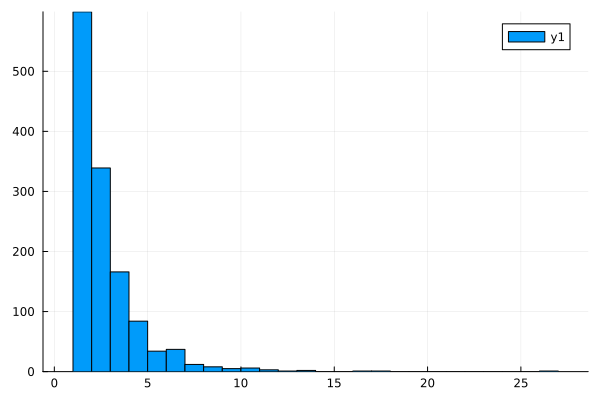

In [299]:
hydist = hyperedge_dist(hhh)
histogram(hydist, bins=minimum(hydist):(maximum(hydist)+1))

In [316]:
[rand(samp) for i in 1:10]


10-element Vector{Int64}:
 1
 1
 1
 3
 1
 1
 1
 3
 2
 1

In [180]:
a = HRA_indirect(h, 6, 5)
b = HRA_direct(h, 6, 5)
#intersect(a,b)
a,b

(0.0, nothing)

In [181]:
NHAS(h,11,7)


0.5

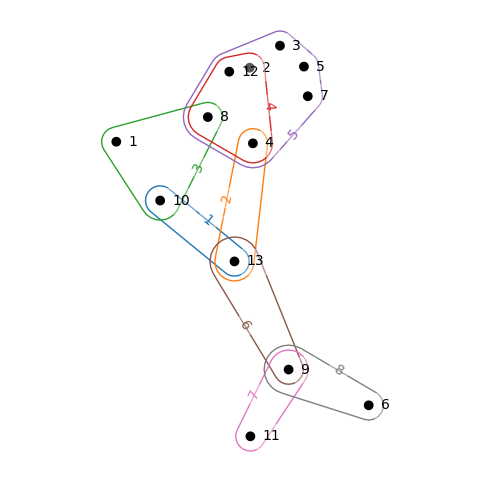

In [109]:
draw(h, HyperNetX; width=6, height=6) #, no_border=true)

In [12]:
scenes = Dict([ (0 , ["FN", "TH"]),
(1 , ["TH", "JV"]),
(2 , ["BM", "FN", "JA"]),
(3 , ["JV", "JU", "CH", "BM"]),
(4 , ["JU", "CH", "BR", "CN", "CC", "JV", "BM"]),
(5 , ["TH", "GP"]),
(6 , ["GP", "MP"]),
(7 , ["MA", "GP"]) ]) |> sort


sscenes = Dict()
for (i,val) in scenes
   
    v = []
    for k in val
        #"@show i,val, k, string(rott[k])
        push!(v, string(rott[k]) ) 
    end
    sscenes[i] = v    
end

# for i in sscenes
#      print(i, sscenes[i])
# end    
    

1 => [1, 2, 3]
2 => [1, 4, 5]
3 => [1, 5, 6, 7, 8]


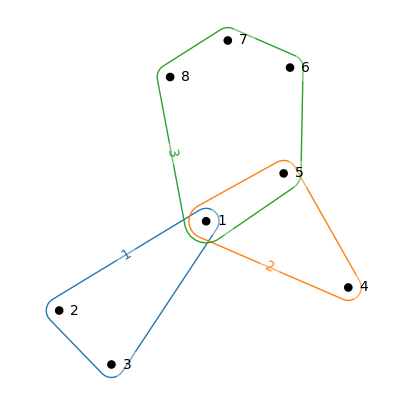

In [13]:
toy = Dict([ (1 , [1,2,3]),
(2 , [1,4,5]),
(3 , [1,5,6,7,8]) ]) |> sort

htoy = Hypergraph{Float64}(8, 3);
for (i,ki) in toy
    println("$i => $ki")
    for k in ki
        htoy[k,i] = 1
        #@show k rott[k] i+1
    end
end
draw(htoy, HyperNetX; width=5, height=5, no_border=true)

In [14]:
# test HRA direct as per fig 1 of HPRA paper
for nod in sort(h_nodes(htoy))
      hrad =  HRA_direct(htoy,1,nod)
      hrain = HRA_indirect(htoy,1,nod)
      hra   = HRA(htoy,1,nod)
    
    println("$(nod) -> hra(1,$(nod)) = $(hrad) + $(hrain) = $(hra)")
end

1 -> hra(1,1) = nothing + nothing = nothing
2 -> hra(1,2) = 0.5 + 0.25 = 0.75
3 -> hra(1,3) = 0.5 + 0.25 = 0.75
4 -> hra(1,4) = 0.5 + 0.1875 = 0.6875
5 -> hra(1,5) = 0.75 + 0.4375 = 1.1875
6 -> hra(1,6) = 0.25 + 0.21875 = 0.46875
7 -> hra(1,7) = 0.25 + 0.21875 = 0.46875
8 -> hra(1,8) = 0.25 + 0.21875 = 0.46875


In [15]:
h_edges(htoy)

3-element Vector{Any}:
 1
 2
 3

In [16]:
# n of vertices 
n_vert = length(ttor)
# n of hyperegdes
n_edges = length(scenes)

h = Hypergraph{Float64}(n_vert, n_edges);
for (i,ki) in scenes
    println("$i => $ki")
    for k in ki
        h[rott[k],i+1] = 1
        #@show k rott[k] i+1
    end
end
h

0 => ["FN", "TH"]
1 => ["TH", "JV"]
2 => ["BM", "FN", "JA"]
3 => ["JV", "JU", "CH", "BM"]
4 => ["JU", "CH", "BR", "CN", "CC", "JV", "BM"]
5 => ["TH", "GP"]
6 => ["GP", "MP"]
7 => ["MA", "GP"]


13×8 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing  1.0        nothing  …   nothing   nothing   nothing
  nothing   nothing   nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing  1.0        nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing   nothing   nothing   nothing  …   nothing   nothing  1.0
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing   nothing  1.0       1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing     1.0       1.0       1.0
 1.0        nothing  1.0        nothing      nothing   nothing   nothing
  nothing   nothing   nothing   nothing  …   nothing  1.0        nothing
  nothing   nothing   nothing  1.0           nothing   nothing   nothing
 1.0       1.0        nothing   nothing     1.0        nothing   not

In [17]:
node_degree(h,4,edge_size=1)


3.0

In [18]:
weighted_h = deepcopy(h)

13×8 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing   nothing  1.0        nothing  …   nothing   nothing   nothing
  nothing   nothing   nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing  1.0        nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing   nothing   nothing   nothing  …   nothing   nothing  1.0
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing   nothing  1.0       1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing     1.0       1.0       1.0
 1.0        nothing  1.0        nothing      nothing   nothing   nothing
  nothing   nothing   nothing   nothing  …   nothing  1.0        nothing
  nothing   nothing   nothing  1.0           nothing   nothing   nothing
 1.0       1.0        nothing   nothing     1.0        nothing   not

Now we add the connection weights

In [19]:
weighted_h[1:3,1] .= 1
weighted_h[3,4] = 2
weighted_h[2,3] = 3
weighted_h[4,3:4] .= 4
weighted_h[5,4] = 5
weighted_h[4:5,2] .= 6
weighted_h[7,5] = 1
weighted_h[6,5] = 1
weighted_h[7,1] = 10
weighted_h

13×8 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  1.0        nothing  1.0        nothing  …   nothing   nothing   nothing
  1.0        nothing  3.0       1.0           nothing   nothing   nothing
  1.0        nothing   nothing  2.0           nothing   nothing   nothing
   nothing  6.0       4.0       4.0           nothing   nothing   nothing
   nothing  6.0        nothing  5.0           nothing   nothing   nothing
   nothing   nothing   nothing   nothing  …   nothing   nothing  1.0
 10.0        nothing   nothing   nothing      nothing   nothing   nothing
   nothing   nothing  1.0       1.0           nothing   nothing   nothing
   nothing   nothing   nothing   nothing     1.0       1.0       1.0
  1.0        nothing  1.0        nothing      nothing   nothing   nothing
   nothing   nothing   nothing   nothing  …   nothing  1.0        nothing
   nothing   nothing   nothing  1.0           nothing   nothing   nothing
  1.0       1.0        nothing   nothing     1.0        

In [20]:
for n in h_nodes(h)
    d= node_degree(h,n)
    dw = node_degree(weighted_h,n)
    @show n, d, dw
end    


(n, d, dw) = (13, 3.0, 3.0)
(n, d, dw) = (10, 2.0, 2.0)
(n, d, dw) = (4, 3.0, 15.0)
(n, d, dw) = (8, 3.0, 3.0)
(n, d, dw) = (1, 1.0, 2.0)
(n, d, dw) = (2, 2.0, 6.0)
(n, d, dw) = (12, 2.0, 2.0)
(n, d, dw) = (5, 1.0, 12.0)
(n, d, dw) = (7, 1.0, 11.0)
(n, d, dw) = (3, 1.0, 4.0)
(n, d, dw) = (9, 3.0, 3.0)
(n, d, dw) = (11, 1.0, 1.0)
(n, d, dw) = (6, 1.0, 2.0)


In [21]:
nhe(h), nhv(h)

(8, 13)

In [22]:
h_nodes(h)

13-element Vector{Any}:
 13
 10
  4
  8
  1
  2
 12
  5
  7
  3
  9
 11
  6

In [23]:
n4 = h_Neighbours(h,6)
n5 =h_Neighbours(h,13)
a=RA(h,4,5)
@show n4, n5
@show n4 ∩ n5
@show a

(n4, n5) = (Set(Any[9]), Set(Any[4, 10, 9]))
n4 ∩ n5 = Set(Any[9])
a = nothing


In [26]:
for i in sort(h_nodes(h))
    println("$i $(RA(h,i,4))")
end

1 0.3333333333333333
2 nothing
3 nothing
4 4.666666666666666
5 nothing
6 0.0
7 nothing
8 nothing
9 0.3333333333333333
10 0.6666666666666666
11 0.0
12 nothing
13 nothing


In [27]:
#basic operations over the hg h
# @assert add_vertex![h) == "v1"
# @assert add_hyperedge![h) == "e1"

# h["v1", "e1"] = 1.
# #h[6,5] = 1.3
# h

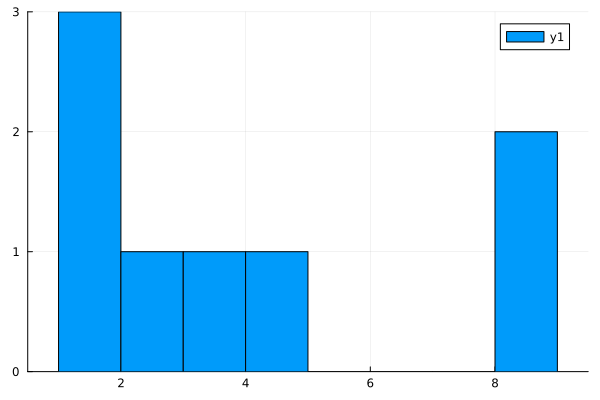

In [28]:
StatsPlots.histogram([1,2,1,1,4,3,8,8],bins=1:9)#,weights=[4,7,3,9,12,2,6,100])

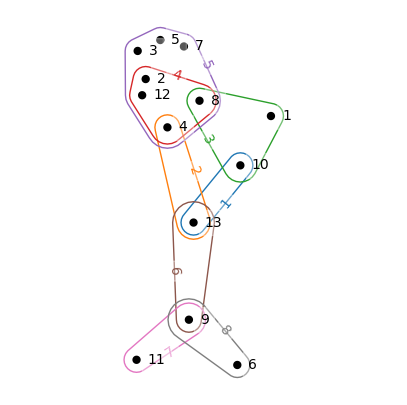

In [29]:
draw(h, HyperNetX; width=5, height=5, no_border=true)

In [30]:
conductance(h, Set([1,2,3]))

3.5

In [31]:
a = gethyperedges(h,4)
b = getvertices(h,5)
a,b

(Dict(5 => 1.0, 4 => 1.0, 2 => 1.0), Dict(5 => 1.0, 4 => 1.0, 7 => 1.0, 2 => 1.0, 12 => 1.0, 8 => 1.0, 3 => 1.0))

In [32]:
h.he_meta

8-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

## Open some HPRA data files

In [33]:
using MAT
hpradatadir = projectdir("HyperedgePrediction/dataset_utils/Datasets")

citeseer1 = matread( joinpath(hpradatadir, "citeseer_coreference.mat") )
citeseer3 = matread( joinpath(hpradatadir, "citeseer_cocitation.mat") )

Dict{String, Any} with 2 entries:
  "S"         => sparse([1, 2, 1, 3, 4, 5, 6, 1, 7, 1  …  305, 1012, 671, 1013,…
  "index_map" => Dict{String, Any}("brown98utility"=>434, "hattori99socialware"…

In [34]:
keys(citeseer1)

KeySet for a Dict{String, Any} with 2 entries. Keys:
  "S"
  "index_map"

In [35]:
c1 = citeseer1["S"]
c1[1:20,1:10]

20×10 SparseArrays.SparseMatrixCSC{Float64, Int64} with 20 stored entries:
⎡⡇⠀⠀⠀⠀⎤
⎢⡇⠀⠀⠀⠀⎥
⎢⢇⠀⠀⠀⠀⎥
⎢⠘⡄⠀⠀⠀⎥
⎣⠀⢸⠀⠀⠀⎦

In [36]:
Hcitecoref = Hypergraph{Float64}(size(c1)...)
nonzeros = findall(!=(0.), c1) # c1 is a swallow copy of citeseer1["S"]
Hcitecoref[nonzeros] .= 1.;

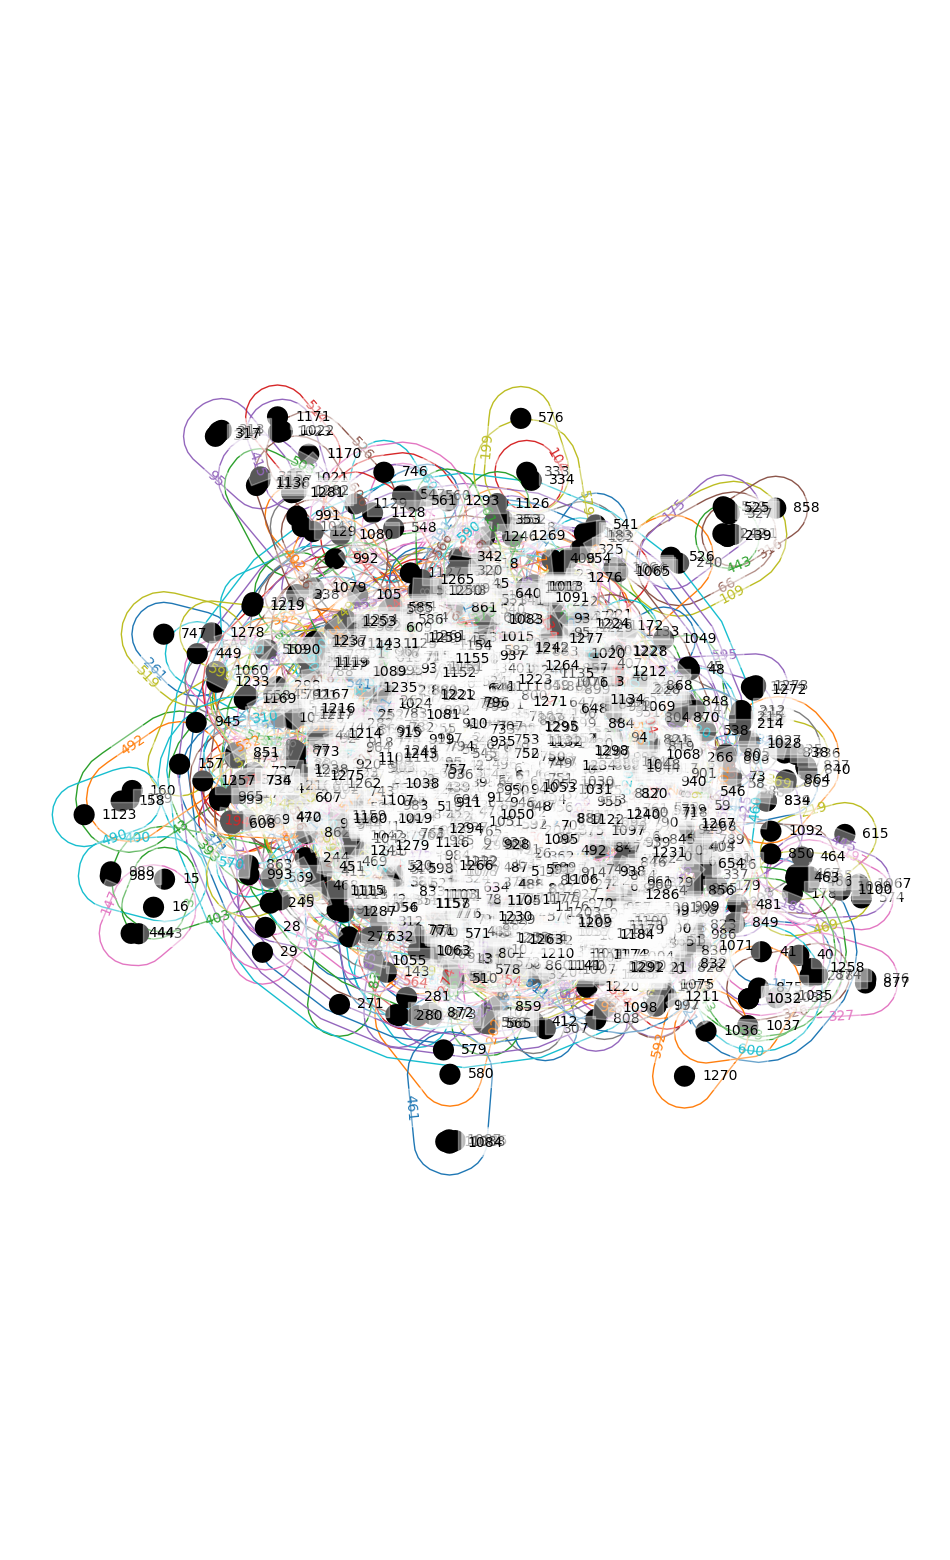

In [250]:
draw(Hcitecoref, HyperNetX; width=12, height=20, no_border=true)

In [210]:
citeseer1["index_map"]
#typeof(citeseer1["S"])

SparseArrays.SparseMatrixCSC{Float64, Int64}

## Visualizing a hypegraph

To visualize a given hypergraph `h`, the user needs to specify two mandatory parameters:
1. the hypergraph `h` to draw
2. which method should be used to visualize `h`
    * `GraphBased` represents each hyperedge `he` with a *fake* vertex `fv` to which each vertex `v ∈ he` is connected.
    * `HyperNetX` renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. 

### A `GraphBased` visualization

#### Vertices options

* If `with_node_labels=true`, but `node_labels` is not specified, vertex ids will be used as their label.

In [248]:
SimpleHypergraphs.draw(hhh, 
    GraphBased; 
    width=1000, 
    height=1500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #wheter displaying or not node labels
    with_node_metadata_hover=true
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div4\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"169\":1.0,\"1\":1.0},{\"427\":1.0,\"1\":1.0},{\"1\":1.0,\"591\":1.0},{\"88\":1.0,\"1\":1.0},{\"1\":1.0},{\"1\":1.0},{\"1\":1.0},{\"1\":1.0},{\"1\":1.0},{\"124\":1.0,\"193\":1.0,\"235\":1.0,\"1\":1.0},{\"1\":1.0},{\"484\":1.0,\"81\":1.0,\"173\":1.0,\"398\":1.0,\"44\":1.0,\"135\":1.0,\"145\":1.0,\"288\":1.0,\"536\":1.0,\"549\":1.0,\"303\":1.0,\"318\":1.0,\"2\":1.0,\"163\":1.0,\"565\":1.0,\"257\":1.0},{\"312\":1.0,\"41\":1.0,\"170\":1.0,\"2\":1.0,\"241\":1.0,\"440\":1.0,\"255\":1.0,\"153\":1.0,\"460\":1.0,\"433\":1.0},{\"456\":1.0,\"2\":1.0,\"73\":1.0,\"536\":1.0},{\"403\":1.0,\"3\":1.0,\"400\":1.0},{\"147\":1.0,\"3\":1.0},{\"4\":1.0,\"390\":1.0},{\"4\":1.0,\"390\":1.0,\"249\":1.0},{\"589\":1.0,\"4\":1.0,\"390\":1.0,\"30\":1.0,\"249\":1.0,\"116\":1.0,\"23\":1.0,\"439\":1.0},{\"4\":1.0,\"390\":1.0,\"280\":1.0},{\"5\":1.0,\"361\":1.0,\"86\":1.0,\"117\":1.0,\"265\":1.0,\"38\":1.0,\"30\":1.0,\"482\":1.0,\"249\":1.0,\"464\":1.0},{\"5\":1.0,\"231\":1.0,\"203\":1.0,\"48\":1.0},{\"5\":1.0,\"181\":1.0,\"48\":1.0},{\"5\":1.0,\"231\":1.0,\"203\":1.0,\"482\":1.0,\"48\":1.0},{\"84\":1.0,\"6\":1.0},{\"6\":1.0,\"282\":1.0},{\"6\":1.0,\"425\":1.0,\"46\":1.0},{\"7\":1.0,\"607\":1.0},{\"7\":1.0},{\"7\":1.0,\"195\":1.0},{\"8\":1.0},{\"484\":1.0,\"42\":1.0,\"8\":1.0,\"398\":1.0},{\"152\":1.0,\"409\":1.0,\"9\":1.0,\"98\":1.0,\"196\":1.0,\"569\":1.0},{\"409\":1.0,\"9\":1.0,\"196\":1.0},{\"9\":1.0,\"98\":1.0},{\"409\":1.0,\"9\":1.0},{\"152\":1.0,\"409\":1.0,\"9\":1.0,\"98\":1.0,\"196\":1.0,\"569\":1.0},{\"10\":1.0,\"395\":1.0},{\"10\":1.0,\"395\":1.0},{\"11\":1.0,\"185\":1.0},{\"11\":1.0,\"307\":1.0,\"543\":1.0,\"573\":1.0,\"421\":1.0,\"57\":1.0,\"185\":1.0},{\"12\":1.0},{\"333\":1.0,\"583\":1.0,\"368\":1.0,\"12\":1.0},{\"12\":1.0},{\"13\":1.0},{\"551\":1.0,\"13\":1.0,\"431\":1.0},{\"13\":1.0,\"340\":1.0,\"595\":1.0},{\"13\":1.0},{\"14\":1.0},{\"14\":1.0,\"582\":1.0},{\"466\":1.0,\"14\":1.0},{\"169\":1.0,\"14\":1.0},{\"14\":1.0},{\"404\":1.0,\"237\":1.0,\"355\":1.0,\"236\":1.0,\"14\":1.0,\"238\":1.0,\"580\":1.0,\"582\":1.0,\"522\":1.0},{\"15\":1.0,\"132\":1.0},{\"15\":1.0,\"262\":1.0},{\"16\":1.0,\"20\":1.0,\"18\":1.0,\"24\":1.0,\"225\":1.0,\"186\":1.0},{\"16\":1.0,\"321\":1.0},{\"16\":1.0,\"18\":1.0},{\"68\":1.0,\"24\":1.0,\"17\":1.0},{\"68\":1.0,\"17\":1.0},{\"50\":1.0,\"420\":1.0,\"414\":1.0,\"17\":1.0},{\"50\":1.0,\"420\":1.0,\"510\":1.0,\"60\":1.0,\"17\":1.0,\"96\":1.0},{\"68\":1.0,\"17\":1.0},{\"50\":1.0,\"420\":1.0,\"414\":1.0,\"17\":1.0},{\"334\":1.0,\"68\":1.0,\"17\":1.0},{\"18\":1.0,\"314\":1.0},{\"18\":1.0,\"314\":1.0,\"165\":1.0},{\"51\":1.0,\"49\":1.0,\"84\":1.0,\"279\":1.0,\"352\":1.0,\"470\":1.0,\"155\":1.0,\"284\":1.0,\"372\":1.0,\"19\":1.0},{\"84\":1.0,\"470\":1.0,\"372\":1.0,\"19\":1.0},{\"483\":1.0,\"44\":1.0,\"90\":1.0,\"351\":1.0,\"556\":1.0,\"127\":1.0,\"125\":1.0,\"470\":1.0,\"19\":1.0},{\"84\":1.0,\"279\":1.0,\"352\":1.0,\"515\":1.0,\"470\":1.0,\"19\":1.0},{\"20\":1.0,\"321\":1.0},{\"333\":1.0,\"21\":1.0},{\"333\":1.0,\"21\":1.0},{\"333\":1.0,\"21\":1.0,\"368\":1.0,\"601\":1.0},{\"64\":1.0,\"333\":1.0,\"21\":1.0},{\"64\":1.0,\"333\":1.0,\"21\":1.0,\"232\":1.0},{\"22\":1.0,\"550\":1.0,\"222\":1.0},{\"22\":1.0,\"278\":1.0,\"568\":1.0,\"80\":1.0,\"192\":1.0,\"222\":1.0},{\"22\":1.0,\"222\":1.0},{\"22\":1.0,\"576\":1.0,\"222\":1.0,\"373\":1.0},{\"22\":1.0,\"576\":1.0,\"507\":1.0,\"222\":1.0},{\"22\":1.0,\"550\":1.0,\"576\":1.0,\"222\":1.0},{\"22\":1.0,\"472\":1.0,\"222\":1.0,\"480\":1.0},{\"22\":1.0,\"551\":1.0,\"222\":1.0},{\"23\":1.0},{\"273\":1.0,\"72\":1.0,\"489\":1.0,\"23\":1.0,\"271\":1.0},{\"273\":1.0,\"72\":1.0,\"489\":1.0,\"23\":1.0,\"271\":1.0},{\"363\":1.0,\"72\":1.0,\"23\":1.0},{\"23\":1.0},{\"272\":1.0,\"23\":1.0},{\"68\":1.0,\"24\":1.0},{\"24\":1.0},{\"560\":1.0,\"24\":1.0},{\"24\":1.0,\"314\":1.0}

* Different radii, colors, strokes, stroke-widths, opacities and labels can be specified for each node. If one of these parameters is specified, the corresponding default value for each vertex will be ignored.

In [247]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_colors = ["yellow", "yellow", "yellow", "blue", "red", "red", "blue"],
    node_stroke = "orange", #same stroke for each node
    node_strokes =  ["orange", "orange", "orange", "orange", "black", "black", "black"],
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div3\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"3\":1.0},{\"5\":1.0,\"4\":1.0},{\"5\":1.0},{\"5\":1.0,\"4\":1.0,\"2\":1.0},{\"5\":1.0},{\"8\":1.0},{\"5\":1.0},{\"5\":1.0,\"4\":1.0,\"3\":1.0},{\"6\":1.0,\"7\":1.0,\"8\":1.0},{\"3\":1.0,\"1\":1.0},{\"7\":1.0},{\"5\":1.0,\"4\":1.0},{\"6\":1.0,\"2\":1.0,\"1\":1.0}],\n            [{\"13\":1.0,\"10\":1.0},{\"13\":1.0,\"4\":1.0},{\"10\":1.0,\"8\":1.0,\"1\":1.0},{\"4\":1.0,\"2\":1.0,\"12\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"7\":1.0,\"2\":1.0,\"12\":1.0,\"8\":1.0,\"3\":1.0},{\"13\":1.0,\"9\":1.0},{\"11\":1.0,\"9\":1.0},{\"6\":1.0,\"9\":1.0}],\n            \"div3\",\n            vmeta=[null,null,null,null,null,null,null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=[\"yellow\",\"yellow\",\"yellow\",\"blue\",\"red\",\"red\",\"blue\"],\n            nodeStroke=\"orange\",\n            nodeStrokes=[\"orange\",\"orange\",\"orange\",\"orange\",\"black\",\"black\",\"black\"],\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* If `with_node_weight=true`, each vertex weight within the hyperedges it belongs to will be displayed.

In [125]:
SimpleHypergraphs.draw[
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
    with_node_weight=true
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div7\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.0},{\"3\":3.0,\"1\":1.0},{\"4\":2.0,\"1\":1.0},{\"4\":4.0,\"2\":6.0,\"3\":4.0},{\"4\":5.0,\"2\":6.0},{\"5\":1.0},{\"5\":1.0,\"1\":1.0}],\n            [{\"7\":1.0,\"2\":1.0,\"3\":1.0,\"1\":1.0},{\"5\":6.0,\"4\":6.0},{\"4\":4.0,\"2\":3.0},{\"5\":5.0,\"4\":4.0,\"3\":2.0},{\"6\":1.0,\"7\":1.0}],\n            \"div7\",\n            vmeta=[null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

#### Hyperedges options

In [11]:
draw[
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    with_node_metadata_hover=true,
    with_node_weight=true, #whether displaying vertices metadata on mouse hover
    he_colors=["green", "blue", "red", "yellow","black"], #hyperedges colors
    with_he_labels=true, #whether displaying or not hyperedge labels
    he_labels=["a","b","c","d"], #hyperedges labels
    with_he_metadata_hover=true #whether displaying hyperedges metadata on mouse hover
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div4\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"5\":1.2,\"4\":5.5,\"2\":6.5},{\"5\":1.3}],\n            [{\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"5\":5.5,\"4\":4.5,\"3\":2.5},{\"5\":1.2,\"6\":1.3}],\n            \"div4\",\n            vmeta=[null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=[\"green\",\"blue\",\"red\",\"yellow\",\"black\"],\n            withEdgeLabels=true,\n            edgeLabels=[\"a\",\"b\",\"c\",\"d\"],\n            withHyperedgesMetadataOnHover=true\n            );\n    </script>\n    </footer>\n")

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX][https://github.com/pnnl/HyperNetX).

There are many options for `Hypergraph` plotting. Type `?draw` to see them all.

In [28]:
@doc draw  # press Ctrl+Enter to see documentation for `draw`

```
function draw(
        h::Hypergraph,
        type::Type{GraphBased};
        element::Union{String, Int}=get_next_div_id(),
        width::Int=500,
        height::Int=500,
        radius::Real=10,
        node_radii::Union{AbstractVector{<:Real}, Nothing}=nothing,
        node_color::String="#999",
        node_colors::Union{AbstractVector{String}, Nothing}=nothing,
        node_stroke::Union{String, Nothing} = nothing,
        node_strokes::Union{AbstractVector{String}, Nothing}=nothing,
        stroke_width::Real=0,
        stroke_widths::Union{AbstractVector{<:Real}, Nothing}=nothing,
        node_opacity::Real=1,
        node_opacities::Union{AbstractVector{<:Real}, Nothing}=nothing,
        stroke_opacity::Real=1,
        stroke_opacities::Union{AbstractVector{<:Real}, Nothing}=nothing,
        with_node_labels::Bool=false,
        node_labels::Union{AbstractVector{String}, Nothing}=nothing,
        with_node_metadata_hover::Bool=false,
        with_node_weight::Bool=false,
        he_colors::Union{AbstractVector{String}, Nothing}=nothing,
        with_he_labels::Bool=false,
        he_labels::Union{AbstractVector{String}, Nothing}=nothing,
        with_he_metadata_hover::Bool=false
    )
```

Draw a hypergraph `h` in a web-based environment (e.g. Jupyter Notebook), using a js script based on the library (D3)[https://d3js.org/]. Each hyperedge `he` is represented by a *fake* vertex `fv` to which each vertex `v ∈ he` is connected.

**Arguments**

  * `h` : the hypergraph to draw
  * `type` : how the hypergraph will be drawn. If `type=GraphBased`, each hyperedge

will be represented as a vertex (see above)

  * `width` : width of the figure
  * `height` : height of the figure
  * `radius` : same default radius for each vertex (represented as a circle)
  * `node_radii` : distinct radius values for each vertex
  * `node_color` : same default color for each vertex
  * `node_colors` : distinct node colors for each vertex
  * `node_stroke` : same default stroke for each vertex
  * `node_strokes` : distinct node strokes for each vertex
  * `stroke_width` : same default stroke-width for each vertex
  * `stroke_widths` : distinct stroke-width values for each vertex
  * `node_opacity` : same default opacity for each vertex
  * `node_opacities` : distinct node-opacity values for each vertex
  * `stroke_opacity` :  same default stroke-opacity for each vertex
  * `stroke_opacities` : distinct stroke-opacity values for each vertex
  * `with_node_labels` : whether displaying node labels
  * `node_labels` : node labels to be shown
  * `with_node_metadata_hover` : whether displaying node metadata when hovering each vertex
  * `with_node_weight` : whether displaying node weights within each hyperedge
  * `he_colors` : distinct hyperedge colors for each hyperedge
  * `with_he_labels` : whether displaying hyoeredges labels
  * `with_he_metadata_hover` : whether displaying hyperedge metadata when hovering each hyperedge

```
draw(
    h::Hypergraph,
    type::Type{HyperNetX};
    width::Int=10,
    height::Int=10,
    node_labels::Union{Dict{Int, String}, Nothing}=nothing,
    edge_labels::Union{Dict{Int, String}, Nothing}=nothing,
    collapse_nodes::Bool=false,
    collapse_edges::Bool=false,
    pos::Union{Dict{Int,Pair{Int,Int}}, Nothing}=nothing,
    with_color::Bool=true,
    with_node_counts::Bool=false,
    with_edge_counts::Bool=false,
    layout::PyObject=nx.spring_layout,
    layout_kwargs::Dict=Dict{String, Any}(),
    ax::Union{PyObject, Nothing}=nothing,
    no_border::Bool=false,
    edges_kwargs::Dict=Dict{String, Any}(),
    nodes_kwargs::Dict=Dict{String, Any}(),
    edge_labels_kwargs::Dict=Dict{String, Any}(),
    node_labels_kwargs::Dict=Dict{String, Any}(),
    with_edge_labels::Bool=true,
    with_node_labels::Bool=true,
    label_alpha::Float64=.35
    )
```

Draw a hypergraph `h` as an Euler diagram, using the library [HyperNetX](https://github.com/pnnl/HyperNetX).

**Arguments**

  * `h` : the hypergraph to draw
  * `type` : how the hypergraph will be drawn. If `type=HyperNetX`, the hypergraph will be represented as a Euler Diagram
  * `width` : width of the figure
  * `height` : height of the figure
  * `node_labels` : node labels to be shown
  * `edge_labels` : edge labels to be shown
  * `collapse_nodes` : draws the hypergraph gotten by identifying nodes contained by the same edges (from HyperNetX)
  * `collapse_edges` : draws the hypergraph gotten by identifying edges containing the same nodes (from HyperNetX)
  * `no_border` : indicates wheter the figure should have a border

For more details about the other parameters, please refer to the library [HyperNetX](https://github.com/pnnl/HyperNetX).


## Bipartite View of the hypergraph
The type `BipartiteView` represents a non-materialized view of a bipartite representation hypergraph `h`. Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

The bipartite view of a hypergraph is suitable for processing with the `LightGraphs.jl` package.

Several LightGraphs methods are provided for the compability.

In [126]:
b = BipartiteView[h)

{12, 13} undirected simple Int64 graph

The `BipartiteView` provide LightGraphs.jl compability. 

In [127]:
supertype[typeof[b))

Graphs.SimpleGraphs.AbstractSimpleGraph{Int64}

We add here a edge to a parent Hypergraph of a bisection view. Note that this change will be reflected in the bipartite view

In [128]:
add_vertex![h)

8

This graph can be plotted using `LightGraphs` tools. 

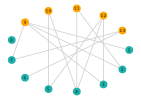

In [129]:
using GraphPlot
using Graphs
nodes, hyperedges = size[h)
nodes_membership = fill[1, nodes)
hyperedges_membership = fill[2, hyperedges)

membership = vcat[nodes_membership, hyperedges_membership)

nodecolor = ["lightseagreen", "orange"]
#membership color
nodefillc = nodecolor[membership]

gplot[b, nodefillc=nodefillc, nodelabel=1:nv[b), layout=circular_layout)

The functionality of `LightGraphs` can be used directly on a bipartite view of a hypergraph. 

In [18]:
Graphs.a_star[b, 1, 3)

2-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 8
 Edge 8 => 3

In [19]:
#number of vertices
nv[b)

12

In [20]:
#number of edges
ne[b)

11

In [21]:
#neighbors
sort[collect[outneighbors[b,5)))

3-element Vector{Int64}:
  9
 11
 12

In [22]:
#neighbors
sort[collect[inneighbors[b,9)))

1-element Vector{Int64}:
 5

In [23]:
#shortest path - it does not consider the nodes associated with a hyperedge
shortest_path[b,1,4)

3-element Vector{Int64}:
 1
 2
 4

## Twosection View of the hypergraph
Represents a two section view of a hypergraph `h`. Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

The bipartite view of a hypergraph is suitable for processing with the `LightGraphs.jl` package.

Several LightGraphs methods are provided for the compability.

 Note that the view will only work correctly for hypergraphs not having overlapping hyperedges. To check
  whether a graph has overlapping edges try has_overlapping_hedges[h) - for such graph you need to fully
  materialize it rather than use a view. This can be achieved via the get_twosection_adjacency_mx[h) method.

In [25]:
# This condition is required for an unmaterialized `TwoSectionView` representation of a hypergraph to make sense
@assert SimpleHypergraphs.has_overlapping_hedges[h) == false

In [26]:
t = TwoSectionView[h)

{7, 8} undirected simple Int64 graph

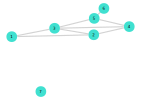

In [27]:
gplot[t, nodelabel=1:nv[t))

In [28]:
#number of vertices
nv[t)

7

In [29]:
#number of edges
ne[t)

8

In [30]:
#neighbors
sort[collect[outneighbors[t,5)))

3-element Vector{Int64}:
 3
 4
 6

In [31]:
#neighbors
sort[collect[inneighbors[t,1)))

2-element Vector{Int64}:
 2
 3

In [32]:
#shortest path 
shortest_path[t,1,5)

3-element Vector{Int64}:
 1
 3
 5

## Community detection in hypergraphs

Let us consider the following hypergraph

In [24]:
h = Hypergraph{Float64}[8,7)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5
h[5,5] = 5.5
h[5,6] = 6.5
h[6,7] = 5.5
h[7,7] = 6.5
h[8,7] = 6.5
h[8,6] = 6.5

h

8×7 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 1.5        nothing   nothing   nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing   nothing   nothing
 1.5        nothing   nothing  2.5        nothing   nothing   nothing
  nothing   nothing  4.5       4.5        nothing   nothing   nothing
  nothing  6.5        nothing  5.5       5.5       6.5        nothing
  nothing   nothing   nothing   nothing   nothing   nothing  5.5
  nothing   nothing   nothing   nothing   nothing   nothing  6.5
  nothing   nothing   nothing   nothing   nothing  6.5       6.5

Let us search for communities in the hypergraph `h`

In [25]:
best_comm = findcommunities[h, CFModularityCNMLike[100))

display[best_comm.bm)

display[best_comm.bp)

0.24685714285714283

4-element Vector{Set{Int64}}:
 Set([4, 2, 3, 1])
 Set([6])
 Set([5, 8])
 Set([7])

And now we visualize them in 2-section view

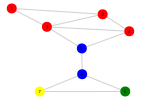

In [26]:
t = TwoSectionView[h)

function get_color[i, bp)
    color = ["red","green","blue","yellow"]
    for j in 1:length[bp)
        if i in bp[j]
            return color[j]
        end
    end
    return "black"
end

gplot[t, nodelabel=1:nv[t), nodefillc=get_color.[1:nv[t), Ref[best_comm.bp) ))


